### Bankruptcy Prevention Project

##### Bussiness Objective


This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy). The goal of this project is to predict whether the company leads to bankrupt or not.

The data file contains 7 features about 250 companies

The data set includes the following variables:

1)industrial risk: 0=low risk, 0.5=medium risk, 1=high risk.
2)management risk: 0=low risk, 0.5=medium risk, 1=high risk.
3)financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.
4)credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.
5)competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.
6)operating risk: 0=low risk, 0.5=medium risk, 1=high risk.
7)class: bankruptcy, non-bankruptcy (target variable).



In [2]:
# Importing the basic libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading the Dataset
bank = pd.read_csv("bankruptcy-prevention.csv")
bank 

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [122]:
bank.shape

(250, 7)

In [123]:
bank.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')

In [124]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [125]:
#checking for the null values
bank.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [4]:
#Data Preprocessing
#bankruptcy = 0 , non-bankruptcy = 1
bank['class_num'] = pd.factorize(bank[' class'])[0]
bank 

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_num
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,0
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,0
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,0
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,1
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,1
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


In [5]:
bank.drop([' class'],axis=1,inplace=True)
bank  

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_num
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


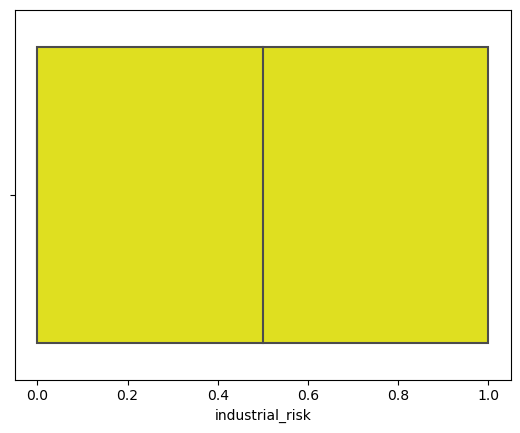

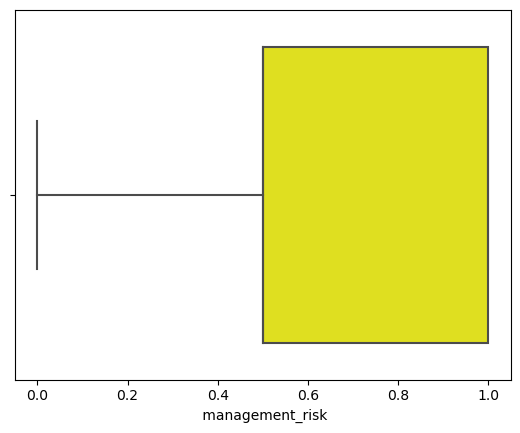

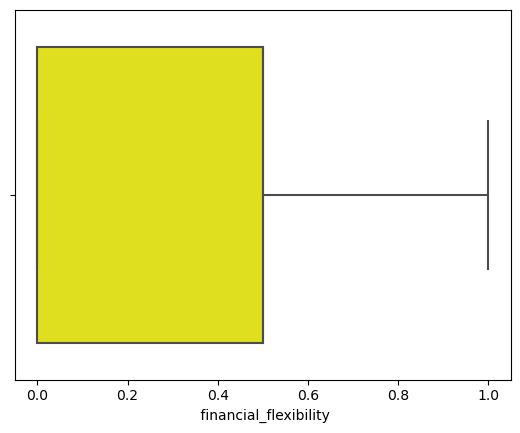

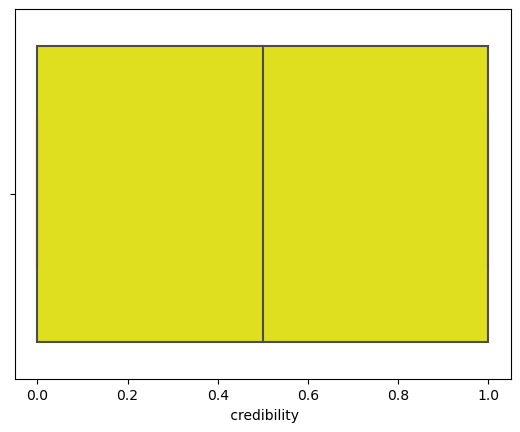

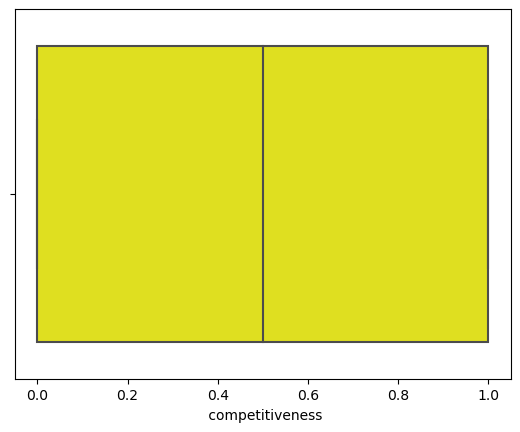

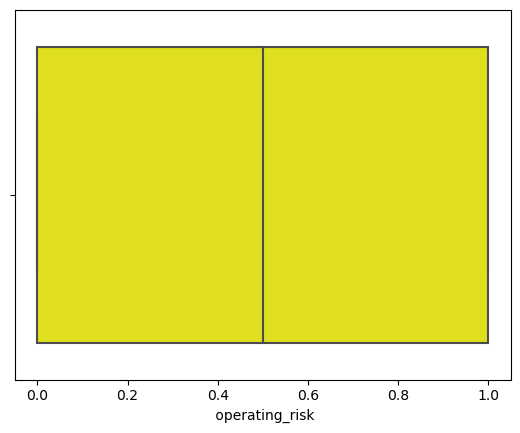

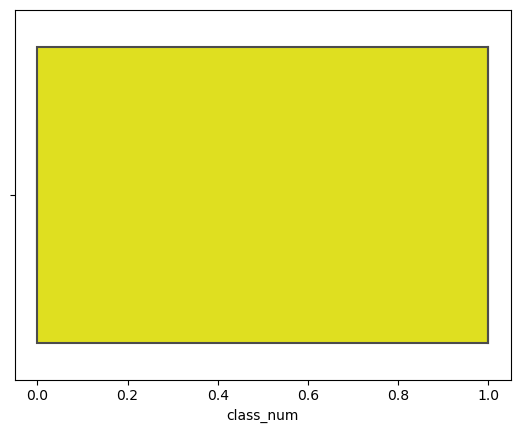

In [128]:
#Boxplots to find the outliers
for i in bank.columns:
    sns.boxplot(bank[i],color='yellow')
    plt.show() 

### There are no outliers in the dataset

<AxesSubplot:xlabel=' credibility', ylabel='count'>

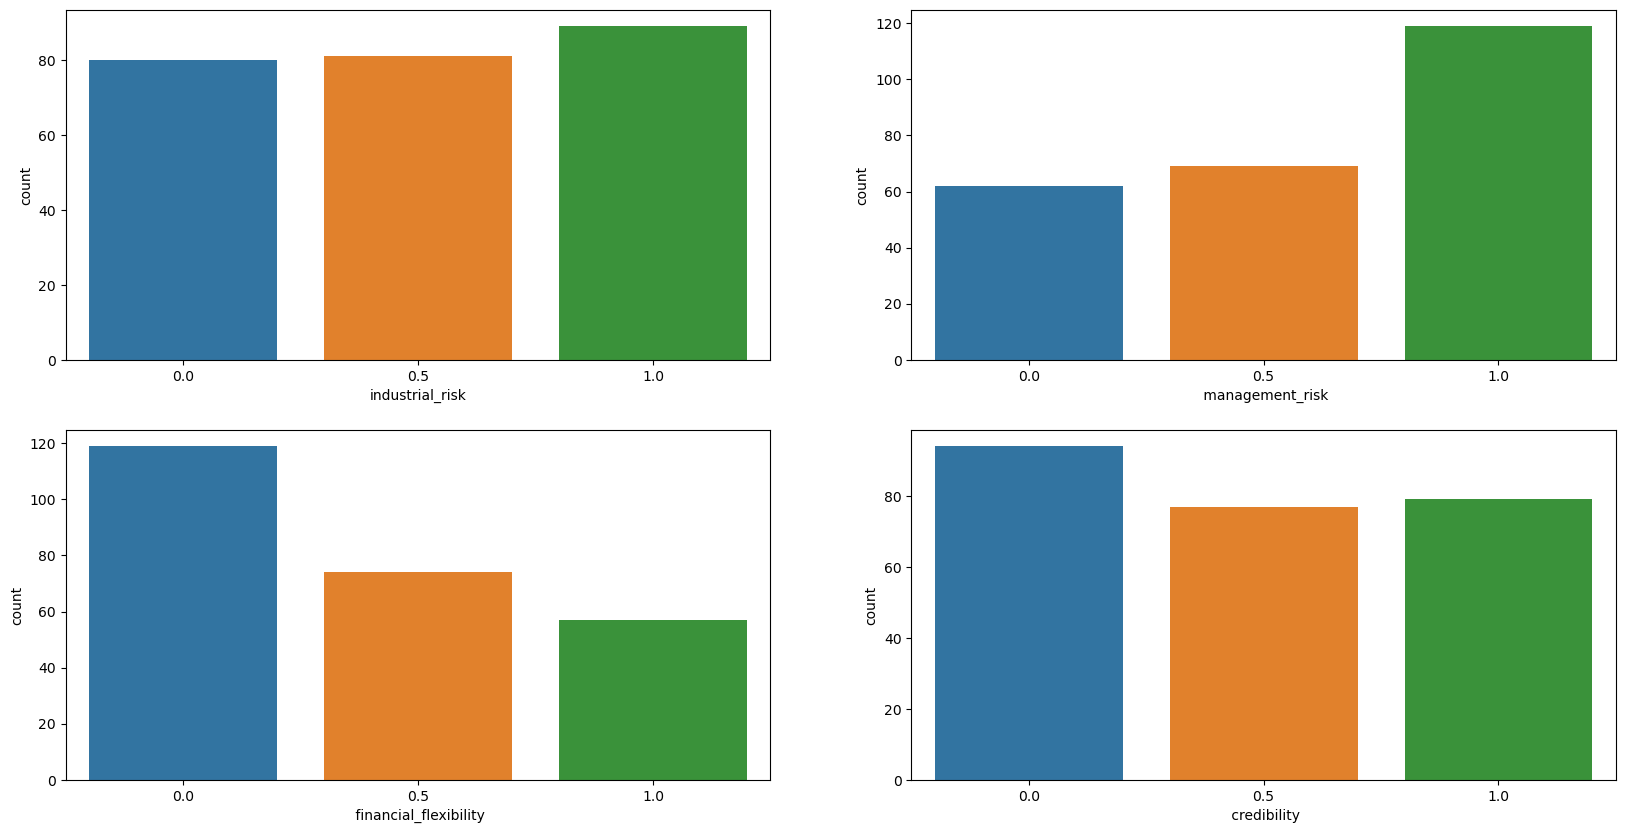

In [18]:
#countplots for all the columns
plt.figure(figsize=(20,10))
#plot1
plt.subplot(2,2,1)
sns.countplot(x="industrial_risk",data=bank) 
#plot2
plt.subplot(2,2,2)
sns.countplot(x=" management_risk",data=bank)
##plot3
plt.subplot(2,2,3)
sns.countplot(x=" financial_flexibility",data=bank)
#plot4
plt.subplot(2,2,4)
sns.countplot(x=" credibility",data=bank)



<AxesSubplot:xlabel='class_num', ylabel='count'>

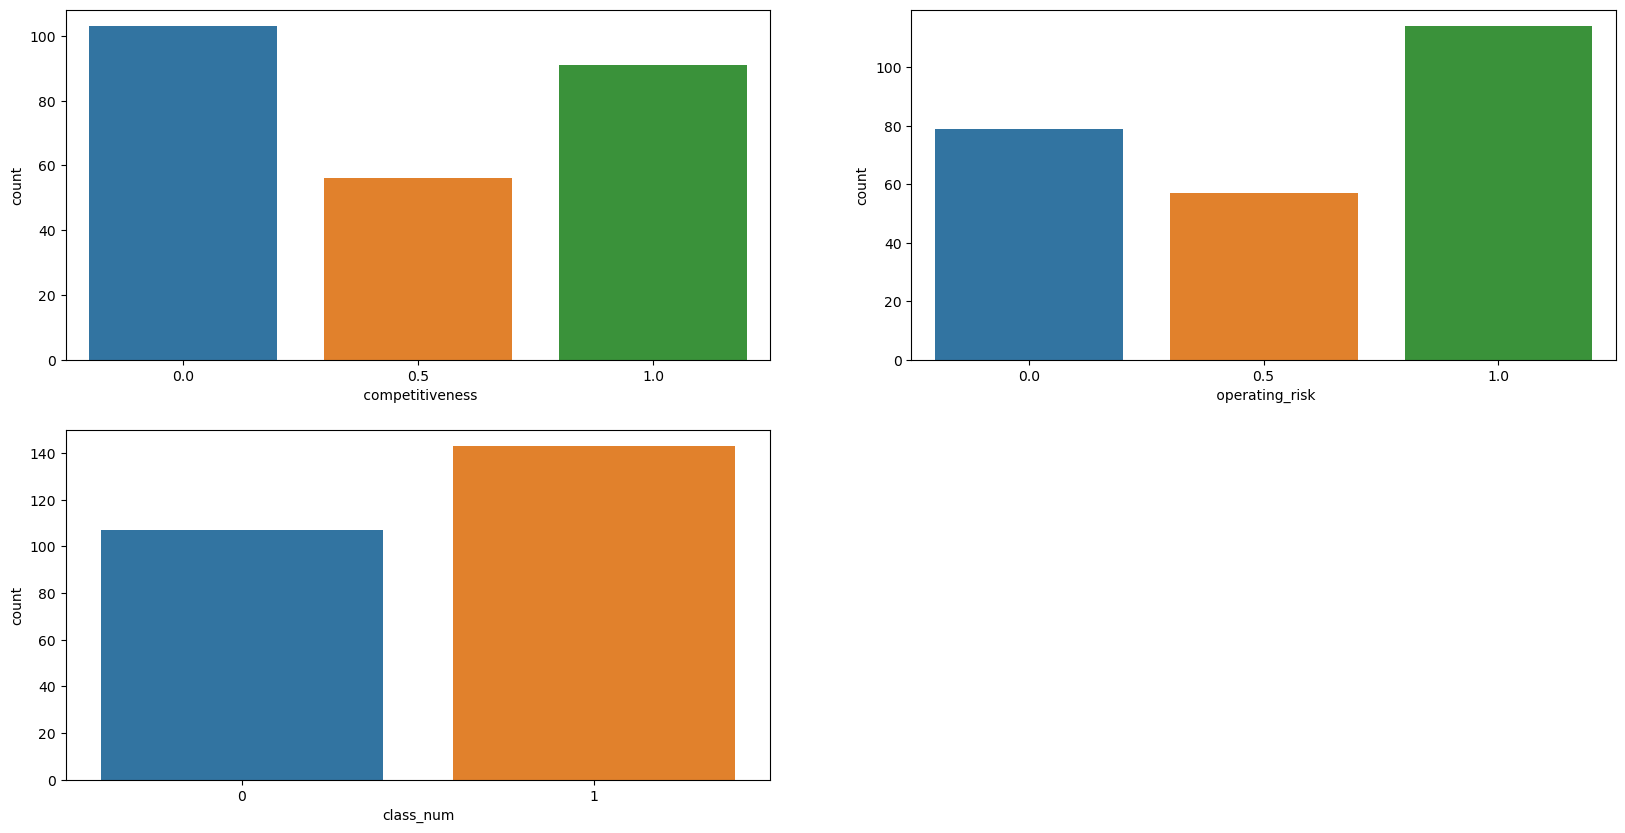

In [21]:
plt.figure(figsize=(20,10))
#plot5
plt.subplot(2,2,1)
sns.countplot(x=" competitiveness",data=bank)
#plot6
plt.subplot(2,2,2)
sns.countplot(x=" operating_risk",data=bank)
#plot7
plt.subplot(2,2,3)
sns.countplot(x="class_num",data=bank)


In [130]:
#Finding the correlation between the variables
bank.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_num
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class_num,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


##### Heatmap

<AxesSubplot:>

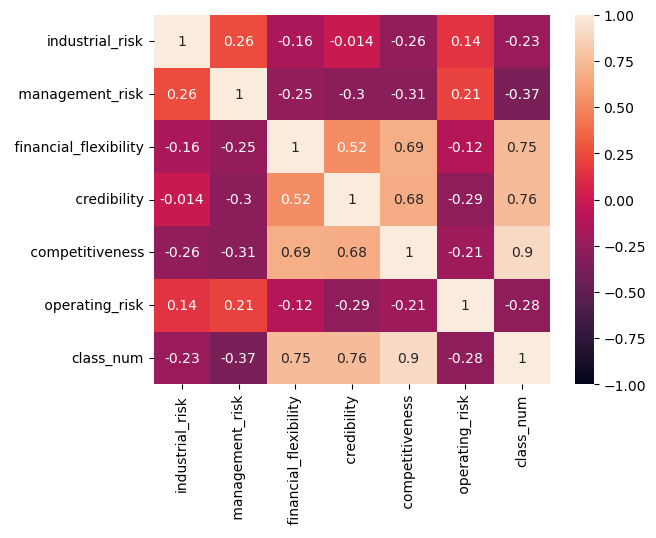

In [131]:
sns.heatmap(bank.corr(),vmin=-1,vmax=1,annot=True)

In [132]:
bank.class_num.value_counts()

1    143
0    107
Name: class_num, dtype: int64

<AxesSubplot:xlabel='industrial_risk'>

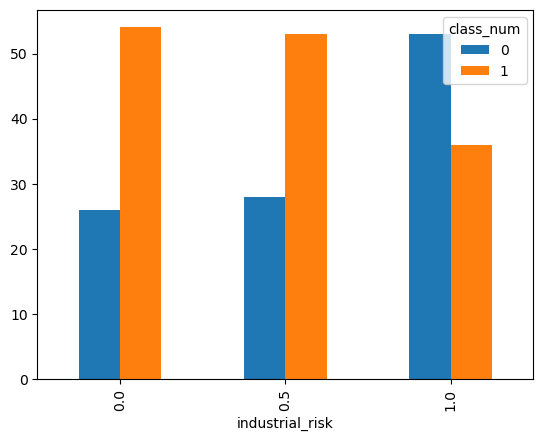

In [32]:
pd.crosstab(bank["industrial_risk"],bank["class_num"]).plot(kind='bar')

<AxesSubplot:xlabel=' financial_flexibility'>

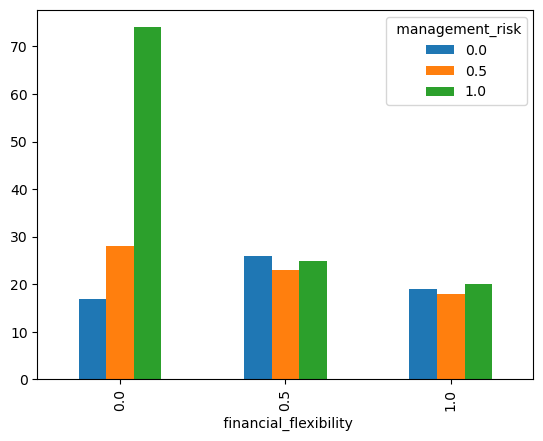

In [134]:
pd.crosstab(bank[' financial_flexibility'],bank[' management_risk']).plot(kind='bar')

<AxesSubplot:xlabel=' operating_risk'>

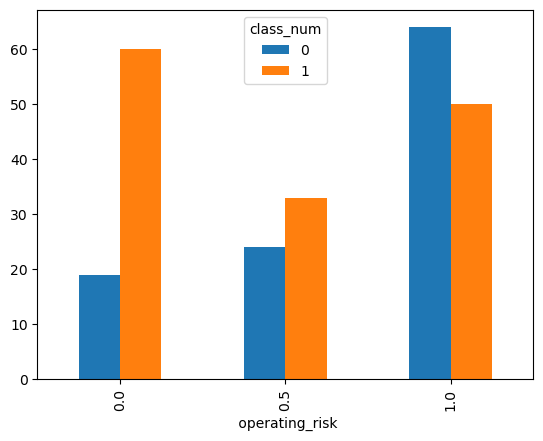

In [33]:
pd.crosstab(bank[' operating_risk'],bank['class_num']).plot(kind='bar') 

<AxesSubplot:xlabel=' competitiveness'>

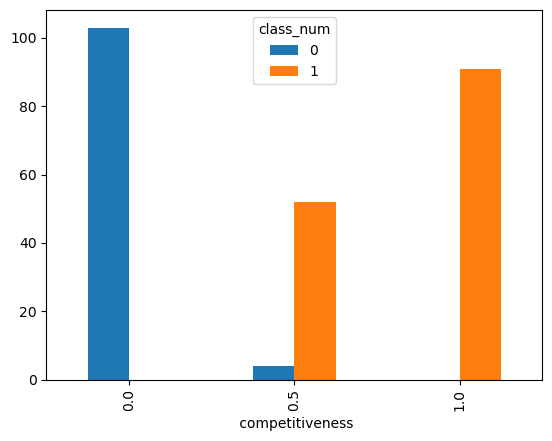

In [34]:
pd.crosstab(bank[' competitiveness'],bank['class_num']).plot(kind='bar')  

In [137]:
# x contains the independent variables
# y contains the target variable
x = bank.iloc[:,:-1] 
y = bank.iloc[:,-1]

In [138]:
#splitting the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape,y_train.shape,x_test.shape,y_test.shape 

((200, 6), (200,), (50, 6), (50,))

## Model Building

### Logistic Regression

In [139]:
#import the libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [140]:
model = LogisticRegression()
model.fit(x_train,y_train) 

LogisticRegression()

In [141]:
#coefficients of features
model.coef_

array([[-0.47708154, -0.76388501,  2.44455271,  2.37453278,  3.75882044,
        -0.48513004]])

In [142]:
#predicting the probabilities
ypred1 =model.predict(x_train)
ypred2=model.predict(x_test) 

In [143]:
#confusion matrix for training data
cm1=confusion_matrix(y_train,ypred1) 
cm1

array([[ 88,   1],
       [  0, 111]], dtype=int64)

In [144]:
pd.crosstab(ypred1,y_train)

class_num,0,1
row_0,,
0,88,0
1,1,111


In [145]:
#confusion matrix for testing data
cm2 = confusion_matrix(y_test,ypred2)
cm2

array([[18,  0],
       [ 0, 32]], dtype=int64)

In [146]:
pd.crosstab(ypred2,y_test)

class_num,0,1
row_0,,
0,18,0
1,0,32


In [147]:
#classification report of training data
cl1=classification_report(y_train,ypred1) 
print(cl1) 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        89
           1       0.99      1.00      1.00       111

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [148]:
#classification report of testing data
cl2=classification_report(y_test,ypred2)
print(cl2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        32

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [149]:
#Accuracy
from sklearn.metrics import accuracy_score

In [150]:
#Training accuracy
tracc1 = accuracy_score(y_train,ypred1)
tracc1

0.995

In [151]:
#Testing accuracy
tesacc1 = accuracy_score(y_test,ypred2)
tesacc1

1.0

### Decision Tree

##### Using Entropy Criteria 

In [152]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [153]:
dc1 = DecisionTreeClassifier(criterion='entropy',max_depth=4)
dc1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(0.4, 0.875, 'X[4] <= 0.25\nentropy = 0.991\nsamples = 200\nvalue = [89, 111]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 85\nvalue = [85, 0]'),
 Text(0.6, 0.625, 'X[3] <= 0.25\nentropy = 0.218\nsamples = 115\nvalue = [4, 111]'),
 Text(0.4, 0.375, 'X[4] <= 0.75\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 108\nvalue = [0, 108]')]

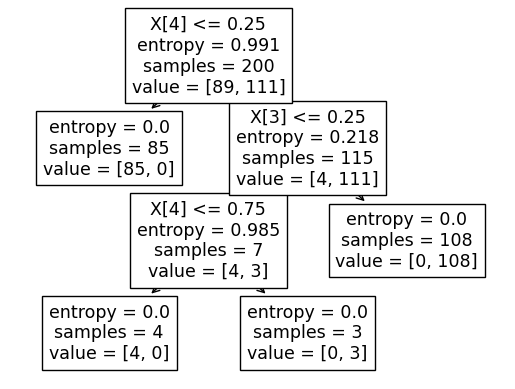

In [154]:
tree.plot_tree(dc1)

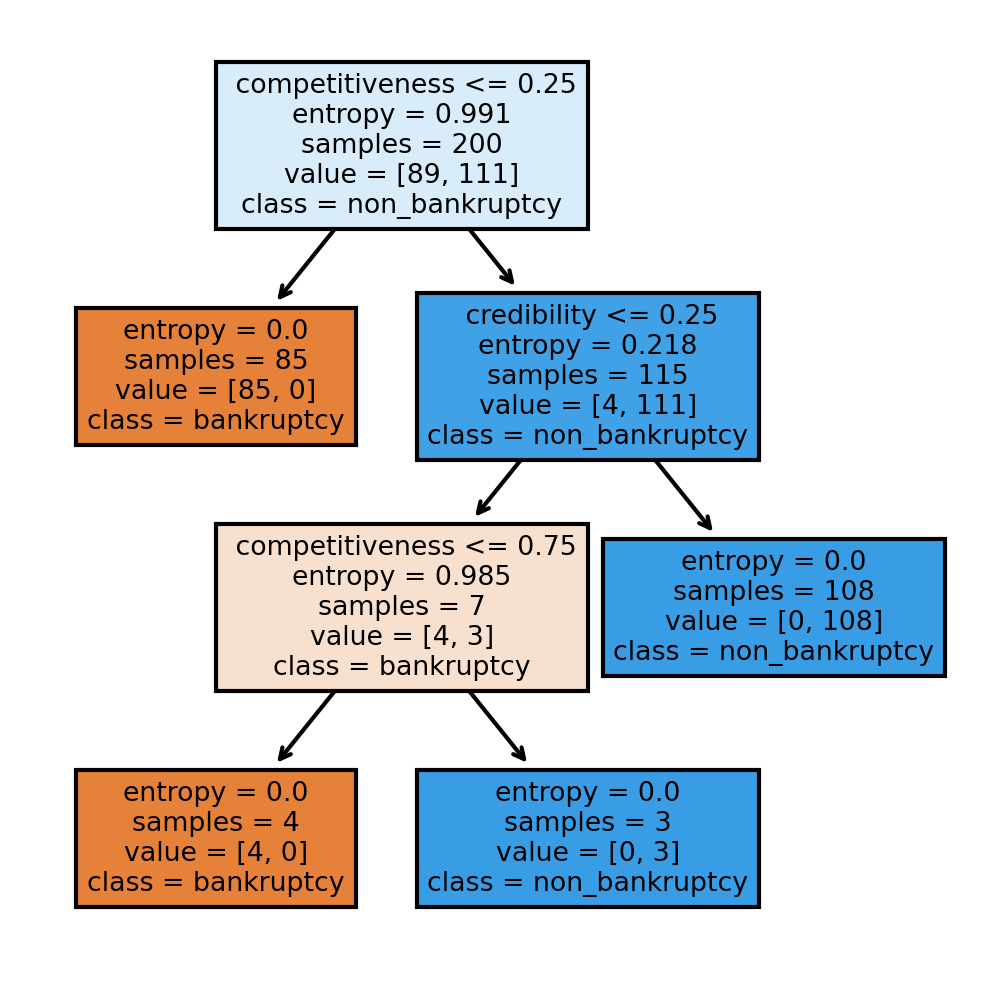

In [155]:
fn=['industrial_risk',' management_risk',' financial_flexibility',' credibility',' competitiveness',' operating_risk']
cn=['bankruptcy','non_bankruptcy']
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(dc1,feature_names=fn,class_names=cn,filled=True);

In [156]:
#predicting the values
dpred1=dc1.predict(x_train)
dpred2=dc1.predict(x_test)

In [157]:
pd.crosstab(y_train,dpred1)

col_0,0,1
class_num,,
0,89,0
1,0,111


In [158]:
pd.crosstab(y_test,dpred2)

col_0,0,1
class_num,,
0,18,0
1,1,31


In [159]:
#Accuracy
tracc2 = np.mean(dpred1==y_train)
tracc2

1.0

In [160]:
tesacc2 = np.mean(dpred2==y_test)
tesacc2

0.98

#### Using Gini Criteria

In [161]:
gini = DecisionTreeClassifier(criterion='gini',max_depth=3)
gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.4, 0.875, 'X[4] <= 0.25\ngini = 0.494\nsamples = 200\nvalue = [89, 111]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 85\nvalue = [85, 0]'),
 Text(0.6, 0.625, 'X[3] <= 0.25\ngini = 0.067\nsamples = 115\nvalue = [4, 111]'),
 Text(0.4, 0.375, 'X[4] <= 0.75\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 108\nvalue = [0, 108]')]

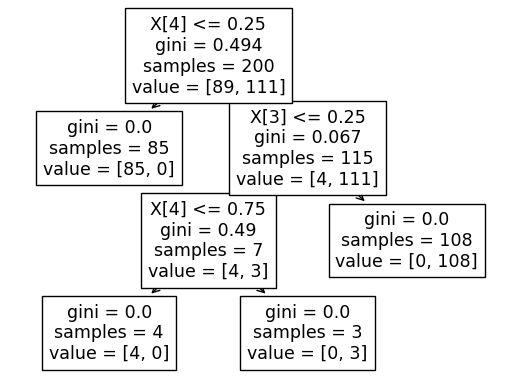

In [162]:
tree.plot_tree(gini)

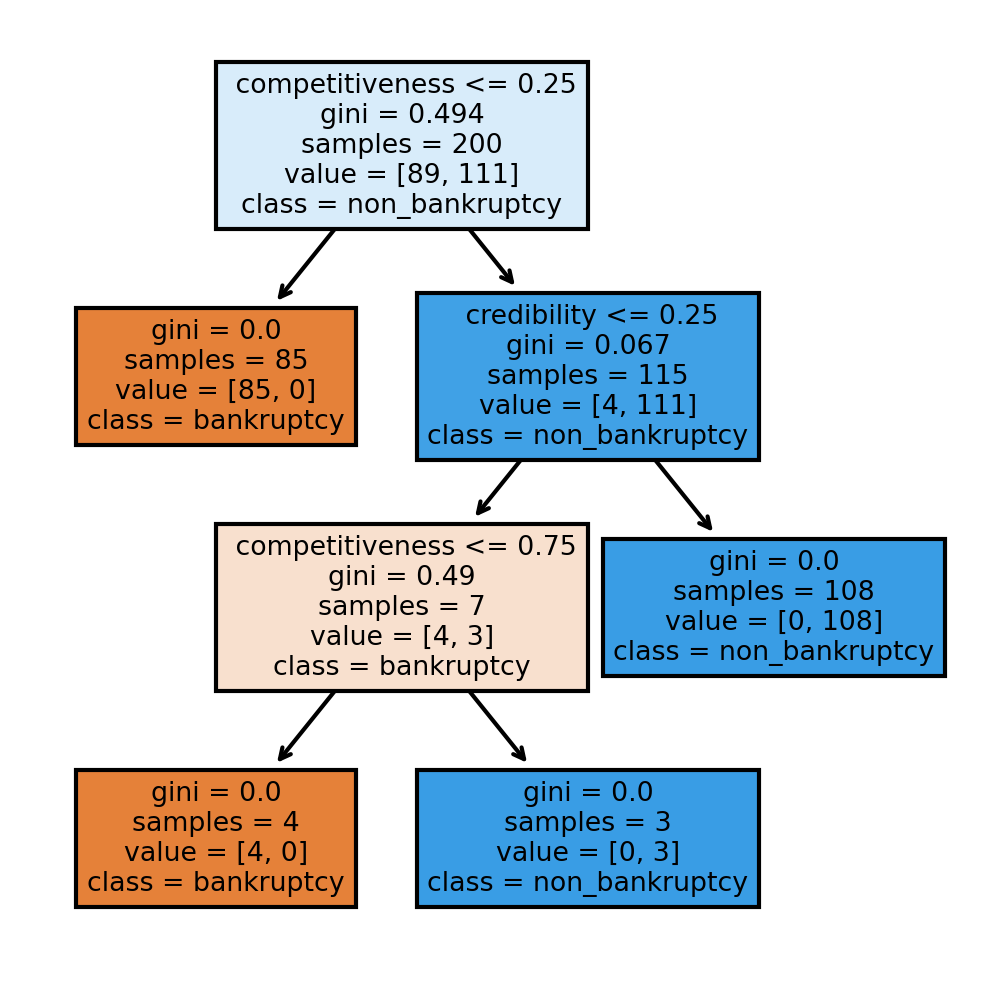

In [163]:
fn=['industrial_risk',' management_risk',' financial_flexibility',' credibility',' competitiveness',' operating_risk']
cn=['bankruptcy','non_bankruptcy']
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(gini,feature_names=fn,class_names=cn,filled=True);

In [164]:
#Predictions
gpred1 = gini.predict(x_train)
gpred2 = gini.predict(x_test)

In [165]:
#Training Accuracy
tracc3 = np.mean(gpred1==y_train)
tracc3

1.0

In [166]:
#Testing Accuracy
tesacc3 = np.mean(gpred2==y_test)
tesacc3

0.98

### Support Vector Machine

In [167]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score

In [168]:
# RBF Model
svm = SVC(kernel='rbf') 
svm.fit(x_train,y_train) 

SVC()

In [169]:
#predictions
spred1 = svm.predict(x_train) 
spred2 = svm.predict(x_test)

In [170]:
# Training accuracy for rbf model
tracc4 = accuracy_score(y_train,spred1)
tracc4

1.0

In [171]:
#Testing accuracy
tesacc4 = accuracy_score(y_test,spred2)
tesacc4 

1.0

In [172]:
#Linear Model
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [173]:
#predictions
l1=svm.predict(x_train)
l2=svm.predict(x_test)

In [174]:
#Training accuracy for linear model
tracc5=accuracy_score(y_train,l1)
tracc5

0.995

In [175]:
#Testing accuracy 
tesacc5=accuracy_score(y_test,l2)
tesacc5 

1.0

In [176]:
#Polynomial
svm=SVC(kernel='poly')
svm.fit(x_train,y_train)

SVC(kernel='poly')

In [177]:
#predictions
p1=svm.predict(x_train)
p2=svm.predict(x_test)

In [178]:
#Training accuracy
tracc6=accuracy_score(y_train,p1)
tracc6

1.0

In [179]:
#Testing accuracy
tesacc6=accuracy_score(y_test,p2)
tesacc6

0.98

In [180]:
#sigmoid
svm=SVC(kernel='sigmoid')
svm.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [181]:
#predictions
s1=svm.predict(x_train)
s2=svm.predict(x_test) 

In [182]:
#Training accuracy
tracc7=accuracy_score(y_train,s1)
tracc7

0.76

In [183]:
#Testing accuracy
tesacc7=accuracy_score(y_test,s2)
tesacc7

0.88

### Naive Bayes

In [184]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB 

In [185]:
nb=MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB()

In [186]:
npred1=nb.predict(x_train)
npred2=nb.predict(x_test)

In [187]:
#Training accuracy
tracc8=accuracy_score(y_train,npred1)
tracc8 

0.975

In [188]:
#Testing accuracy
tesacc8=accuracy_score(y_test,npred2)
tesacc8 

1.0

### KNN 

In [189]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 

In [190]:
num_folds = 10
kfold = KFold(n_splits=10)

In [191]:
knn = KNeighborsClassifier(n_neighbors=17)
results = cross_val_score(knn, x_train, y_train, cv=kfold)

In [192]:
#Training accutacy
tracc9=results.mean()

In [193]:
tracc9

0.99

In [194]:
#testing accuracy
results=cross_val_score(knn,x_test,y_test,cv=kfold)

In [195]:
tesacc9=results.mean()
tesacc9

0.9800000000000001

### Random Forest

In [196]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

In [197]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
rf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

In [198]:
#Training Accuracy
results = cross_val_score(rf, x_train,y_train, cv=kfold)
tracc10=results.mean()
tracc10

0.9949999999999999

In [199]:
#Testing Accuracy
results=cross_val_score(rf,x_test,y_test,cv=kfold)
tesacc10=results.mean()
tesacc10

1.0

### Bagging

In [200]:
from sklearn.ensemble import BaggingClassifier

In [201]:
kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
bg = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)

In [202]:
#training accuracy
results=cross_val_score(bg,x_train,y_train,cv=kfold)
tracc11=results.mean()
tracc11

0.9949999999999999

In [203]:
#testing accuracy
results=cross_val_score(bg,x_test,y_test,cv=kfold)
tesacc11=results.mean()
tesacc11

1.0

### Boosting

In [204]:
from sklearn.ensemble import AdaBoostClassifier

In [205]:
num_trees = 10
kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees)


In [206]:
#Training accuracy
results = cross_val_score(model, x_train, y_train, cv=kfold)
tracc12=results.mean()
tracc12


0.9949999999999999

In [207]:
#testing accuracy
results=cross_val_score(model,x_test,y_test,cv=kfold)
tesacc12=results.mean()
tesacc12

1.0

### Stacking

In [208]:
from sklearn.ensemble import VotingClassifier

In [209]:
kfold = KFold(n_splits=10)

In [210]:
# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=1000)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3)) 

In [211]:
# create the ensemble model
ensemble = VotingClassifier(estimators)
#training accuracy
results = cross_val_score(ensemble, x_train, y_train, cv=kfold)
tracc13=results.mean() 
tracc13

0.9949999999999999

In [212]:
#Testing accuracy
results = cross_val_score(ensemble, x_test, y_test, cv=kfold)
tesacc13=results.mean() 
tesacc13 

1.0

### Artificial Neural Networks

In [229]:
import keras
import tensorflow 

In [231]:
X = bank.iloc[:,0:6]
Y = bank.iloc[:,6] 

#### Batch Size and Epochs

In [232]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam 

In [233]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=6, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid'))
    
    adam=Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model 

In [234]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,Y) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=1.000 total time=   1.2s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.980 total time=   1.3s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.980 total time=   1.2s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=1.000 total time=   1.1s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=1.000 total time=   1.1s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

In [236]:
# Summarizing the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.9960000038146972, using {'batch_size': 10, 'epochs': 100}
0.9920000076293946,0.009797949627070889 with: {'batch_size': 10, 'epochs': 10}
0.9920000076293946,0.009797949627070889 with: {'batch_size': 10, 'epochs': 50}
0.9960000038146972,0.007999992370605467 with: {'batch_size': 10, 'epochs': 100}
0.9960000038146972,0.007999992370605467 with: {'batch_size': 20, 'epochs': 10}
0.9920000076293946,0.009797949627070889 with: {'batch_size': 20, 'epochs': 50}
0.9920000076293946,0.009797949627070889 with: {'batch_size': 20, 'epochs': 100}
0.9640000104904175,0.023323809869139723 with: {'batch_size': 40, 'epochs': 10}
0.9920000076293946,0.009797949627070889 with: {'batch_size': 40, 'epochs': 50}
0.9920000076293946,0.009797949627070889 with: {'batch_size': 40, 'epochs': 100}


#### Learning Rate and Dropout Rate

In [237]:
from keras.layers import Dropout
def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(6,input_dim = 6,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3,input_dim = 6,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)
# Define the grid search parameters
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,Y) 
 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.940 total time=   3.8s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.980 total time=   3.7s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   3.8s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   3.8s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   3.8s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [238]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.9960000038146972, using {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.9840000033378601,0.02332380782471324 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9960000038146972,0.007999992370605467 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.8240000039339066,0.3420877095528387 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.9960000038146972,0.007999992370605467 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9960000038146972,0.007999992370605467 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.9960000038146972,0.007999992370605467 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.9960000038146972,0.007999992370605467 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.7960000038146973,0.3980753715112361 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.9960000038146972,0.007999992370605467 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


#### Activation Function and Kernel Initializer 

In [239]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(6,input_dim = 6,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(3,input_dim = 6,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.10))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(learning_rate = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,Y)



Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   4.0s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.980 total time=   4.0s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   3.9s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   4.0s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   3.8s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=1.000 total time=   4.0s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................
[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.980 total time=   4.0s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................
[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=1.000 total time=   4.0s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................
[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=1.000 total time=   4.0s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................
[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.980 total time=   4.0s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................
[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.980 total time=   3.9s
[CV 4/5; 11/12] START activation_f

In [240]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.9960000038146972, using {'activation_function': 'softmax', 'init': 'uniform'}
0.9960000038146972,0.007999992370605467 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.9960000038146972,0.007999992370605467 with: {'activation_function': 'softmax', 'init': 'normal'}
0.17200000286102296,0.3440000057220459 with: {'activation_function': 'softmax', 'init': 'zero'}
0.6240000039339065,0.4545591299277465 with: {'activation_function': 'relu', 'init': 'uniform'}
0.7960000038146973,0.3980753715112361 with: {'activation_function': 'relu', 'init': 'normal'}
0.02800000011920929,0.05600000023841858 with: {'activation_function': 'relu', 'init': 'zero'}
0.9920000076293946,0.009797949627070889 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9920000076293946,0.009797949627070889 with: {'activation_function': 'tanh', 'init': 'normal'}
0.02800000011920929,0.05600000023841858 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9920000076293946,0.009797949627070889 with: {'

#### Number of Neurons 

In [241]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 6,kernel_initializer = 'uniform',activation = 'softmax'))
    model.add(Dropout(0.0))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'softmax'))
    model.add(Dropout(0.10))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(learning_rate = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,12]
neuron2 = [2,3,6]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,Y) 


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=1.000 total time=   1.3s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.980 total time=   1.2s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=1.000 total time=   1.2s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=1.000 total time=   1.2s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=1.000 total time=   1.2s
[CV 1/5; 2/9] START neuron1=4, neuron2=3........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=3;,

In [242]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.9960000038146972, using {'neuron1': 4, 'neuron2': 2}
0.9960000038146972,0.007999992370605467 with: {'neuron1': 4, 'neuron2': 2}
0.9960000038146972,0.007999992370605467 with: {'neuron1': 4, 'neuron2': 3}
0.9960000038146972,0.007999992370605467 with: {'neuron1': 4, 'neuron2': 6}
0.9960000038146972,0.007999992370605467 with: {'neuron1': 8, 'neuron2': 2}
0.9960000038146972,0.007999992370605467 with: {'neuron1': 8, 'neuron2': 3}
0.9960000038146972,0.007999992370605467 with: {'neuron1': 8, 'neuron2': 6}
0.9960000038146972,0.007999992370605467 with: {'neuron1': 12, 'neuron2': 2}
0.9960000038146972,0.007999992370605467 with: {'neuron1': 12, 'neuron2': 3}
0.9960000038146972,0.007999992370605467 with: {'neuron1': 12, 'neuron2': 6}


In [243]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(4, input_dim=6, activation='softmax'))
model.add(Dense(2, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(X, Y, epochs=100,validation_split=0.33, batch_size=10)
# evaluate the keras model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 

Epoch 1/100
17/17 [==============================] - 1s 14ms/step - loss: 0.7172 - accuracy: 0.1138 - val_loss: 0.7461 - val_accuracy: 0.0000e+00
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.7069 - accuracy: 0.5030 - val_loss: 0.7649 - val_accuracy: 0.0000e+00
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6975 - accuracy: 0.6407 - val_loss: 0.7831 - val_accuracy: 0.0000e+00
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6890 - accuracy: 0.6407 - val_loss: 0.8011 - val_accuracy: 0.0000e+00
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6812 - accuracy: 0.6407 - val_loss: 0.8169 - val_accuracy: 0.0000e+00
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6746 - accuracy: 0.6407 - val_loss: 0.8311 - val_accuracy: 0.0000e+00
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6681 - accuracy: 0.6407 - val_loss: 0.8376 - val_accur

17/17 [==============================] - 0s 5ms/step - loss: 0.2953 - accuracy: 0.9880 - val_loss: 0.4118 - val_accuracy: 0.9759
Epoch 59/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2900 - accuracy: 0.9880 - val_loss: 0.4046 - val_accuracy: 0.9759
Epoch 60/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2849 - accuracy: 0.9880 - val_loss: 0.3952 - val_accuracy: 0.9759
Epoch 61/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2799 - accuracy: 0.9880 - val_loss: 0.3893 - val_accuracy: 0.9759
Epoch 62/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2751 - accuracy: 0.9880 - val_loss: 0.3832 - val_accuracy: 0.9759
Epoch 63/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2704 - accuracy: 0.9880 - val_loss: 0.3748 - val_accuracy: 0.9759
Epoch 64/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2659 - accuracy: 0.9880 - val_loss: 0.3691 - val_accuracy: 0.9759
Epoch 65/100
17/17 

In [246]:
tracc14 = 0.99
tesacc14 = 0.996

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


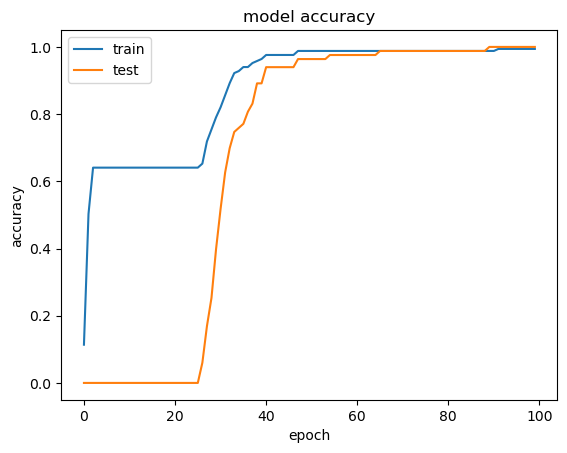

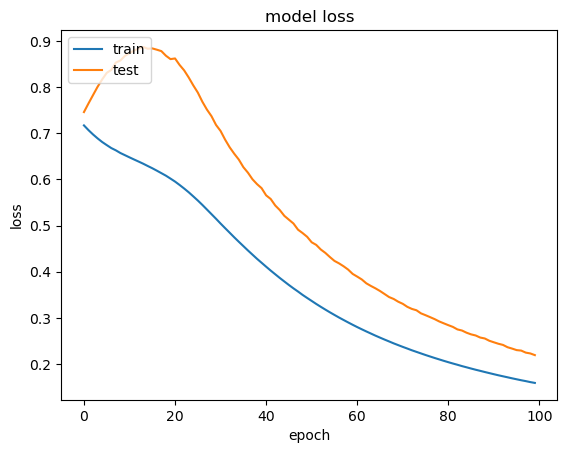

In [244]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 

In [247]:
data={"MODEL":pd.Series(["Logistic","DT(Entropy)","Gini","SVM(rbf)","Linear","Poly","Sigmoid","NaiveBayes","KNN","RandomForest","Bagging","Boosting","Stacking","ANN"]),"Train_Accuracy":pd.Series([tracc1,tracc2,tracc3,tracc4,tracc5,tracc6,tracc7,tracc8,tracc9,tracc10,tracc11,tracc12,tracc13,tracc14]),"Test_Accuracy":pd.Series([tesacc1,tesacc2,tesacc3,tesacc4,tesacc5,tesacc6,tesacc7,tesacc8,tesacc9,tesacc10,tesacc11,tesacc12,tesacc13,tesacc14])}
table=pd.DataFrame(data)
table 

,MODEL,Train_Accuracy,Test_Accuracy
0,Logistic,0.995,1.000
1,DT(Entropy),1.000,0.980
2,Gini,1.000,0.980
3,SVM(rbf),1.000,1.000
4,Linear,0.995,1.000
5,Poly,1.000,0.980
6,Sigmoid,0.760,0.880
7,NaiveBayes,0.975,1.000
8,KNN,0.990,0.980
9,RandomForest,0.995,1.000
